In [14]:
# ипрортируем библиотеки

import string
import random
import pandas as pd
import numpy as np
from scipy.stats import norm, expon
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.cluster import KMeans

In [21]:
url = "https://drive.google.com/u/0/uc?id=1P08K885c5M81d7EuWQeHv_OfPuW-bnO_" 
df = pd.read_csv(url) 

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime']) 


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  100000 non-null  object        
 1   vendor_id           100000 non-null  int64         
 2   pickup_datetime     100000 non-null  datetime64[ns]
 3   dropoff_datetime    100000 non-null  object        
 4   passenger_count     100000 non-null  int64         
 5   pickup_longitude    100000 non-null  float64       
 6   pickup_latitude     100000 non-null  float64       
 7   dropoff_longitude   100000 non-null  float64       
 8   dropoff_latitude    100000 non-null  float64       
 9   store_and_fwd_flag  100000 non-null  object        
 10  trip_duration       100000 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 8.4+ MB


In [37]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2863541,2,2016-01-31 13:12:20,2016-01-31 13:21:37,2,-73.989609,40.741718,-73.991013,40.755867,N,557
1,id1752141,1,2016-05-03 18:20:59,2016-05-03 18:41:09,1,-73.993935,40.761517,-73.975281,40.751507,N,1210
2,id1331142,1,2016-06-05 02:20:39,2016-06-05 02:28:04,1,-73.988625,40.722538,-73.980347,40.742752,N,445
3,id0227018,2,2016-01-11 20:07:13,2016-01-11 20:14:26,1,-73.976723,40.775311,-73.964333,40.765560,N,433
4,id2263790,2,2016-01-22 00:31:59,2016-01-22 00:40:48,5,-74.005852,40.740360,-73.988708,40.758781,N,529


In [36]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

# Отфильтровать датасет по выходным дням
df_weekends = df[df['pickup_datetime'].dt.weekday.isin([5, 6])]  # 5 - суббота, 6 - воскресенье

# Добавить столбец для месяца поездки
df_weekends.loc[:, 'month'] = df_weekends['pickup_datetime'].dt.month

# Подсчет общего количества поездок по месяцам
trip_count_by_month = df_weekends['month'].value_counts()

print(df_weekends)

              id  vendor_id     pickup_datetime    dropoff_datetime  \
0      id2863541          2 2016-01-31 13:12:20 2016-01-31 13:21:37   
2      id1331142          1 2016-06-05 02:20:39 2016-06-05 02:28:04   
5      id3105911          2 2016-03-12 11:45:30 2016-03-12 12:06:40   
6      id3638379          1 2016-02-27 19:24:57 2016-02-27 20:02:12   
9      id0280140          1 2016-04-09 23:33:12 2016-04-09 23:44:10   
...          ...        ...                 ...                 ...   
99988  id2622579          2 2016-03-06 14:12:16 2016-03-06 14:21:13   
99990  id3919255          1 2016-04-10 10:14:43 2016-04-10 10:22:44   
99992  id2189210          2 2016-01-23 05:36:06 2016-01-23 05:53:38   
99994  id0959872          2 2016-03-27 14:39:03 2016-03-27 14:43:05   
99996  id1119642          1 2016-02-13 23:25:04 2016-02-13 23:32:14   

       passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                    2        -73.989609        40.741718         -

C:\Users\alex1\AppData\Local\Temp\ipykernel_20160\1978464430.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weekends.loc[:, 'month'] = df_weekends['pickup_datetime'].dt.month


In [39]:
# вывод общего количества поездок по месяцам
print(trip_count_by_month)

4    5279
5    4977
3    4694
2    4650
1    4610
6    4201
Name: month, dtype: int64


In [15]:
characters = '1234567890abcdefghigk'
random.seed(1)
data = {}

# 1st column
data['uzer_id'] = [''.join(random.sample(characters, 14)) for _ in range(10000)]

# 2nd column
data['order_number'] = np.random.randint(1, 11, size=10000)

# 3rd column
mean = 1440
std = 200
data['delivery_time'] = [round(norm.rvs(mean, std)) for _ in range(10000)]
# 4rd column
lambda_ = 1
data['total_cost'] = [-expon.rvs(scale=1/lambda_) for _ in range(10000)] 

# 5th column
data['getep_op'] = [random.choices((1,2,3,4,5), weights=[35, 25,20,15,5]) for _ in range(10000)]

df = pd.DataFrame(data)
df['getep_op'] = df['getep_op'].apply(sum)
print(df.head())

          uzer_id  order_number  delivery_time  total_cost  getep_op
0  5i394fc8da7g2e             1           1715   -1.195582         4
1  1cdke9bg4026hf             2           1395   -0.538381         1
2  1hkc7dbi948age             8           2014   -0.123603         4
3  b8ge017d9a235k             7           1787   -1.479909         1
4  agdg705f89hi1c             9           1075   -0.389568         3


moda -  -1.1955823215508248
median -  0.4825481294014857
mean -  -1.0063455420398013
Disp and otkl -  0.010173567005612873 1.035014656176949


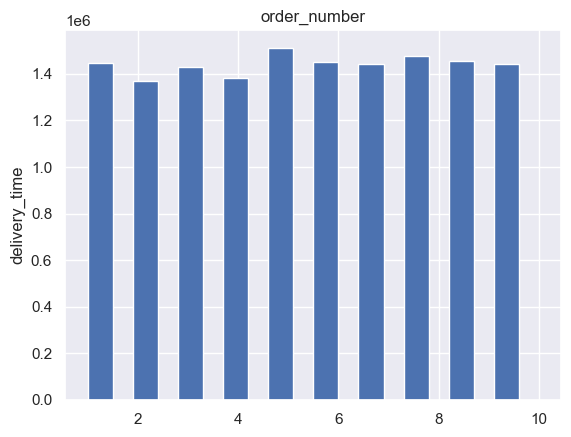

In [16]:
# Для моды
import statistics
mode = statistics.mode(df['total_cost'])
print('moda - ', mode)
#Для медианы:
from scipy.stats import median_abs_deviation
median = median_abs_deviation(df['total_cost'])
print('median - ', median)
#Для среднего значения:
mean = df['total_cost'].mean()
print('mean - ', mean)
#Для дисперсии и стандартного отклонения:
import scipy.stats as st
print('Disp and otkl - ', st.sem(df['total_cost']), st.tvar(df['total_cost']))

# зависимость времени заказа от его номера
df.hist('order_number',weights=df['delivery_time'], width=0.5 )
plt.ylabel('delivery_time')
plt.show()

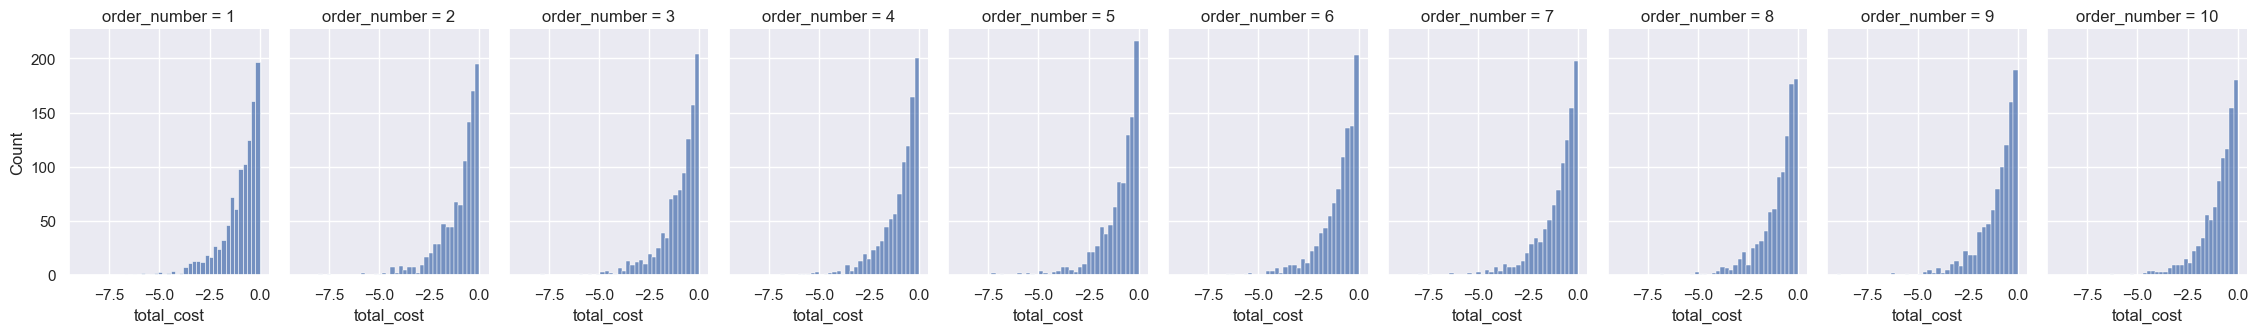

In [7]:

g = sns.FacetGrid(df, col="order_number", height=3.5, aspect=.65)
g.map(sns.histplot , 'total_cost' )


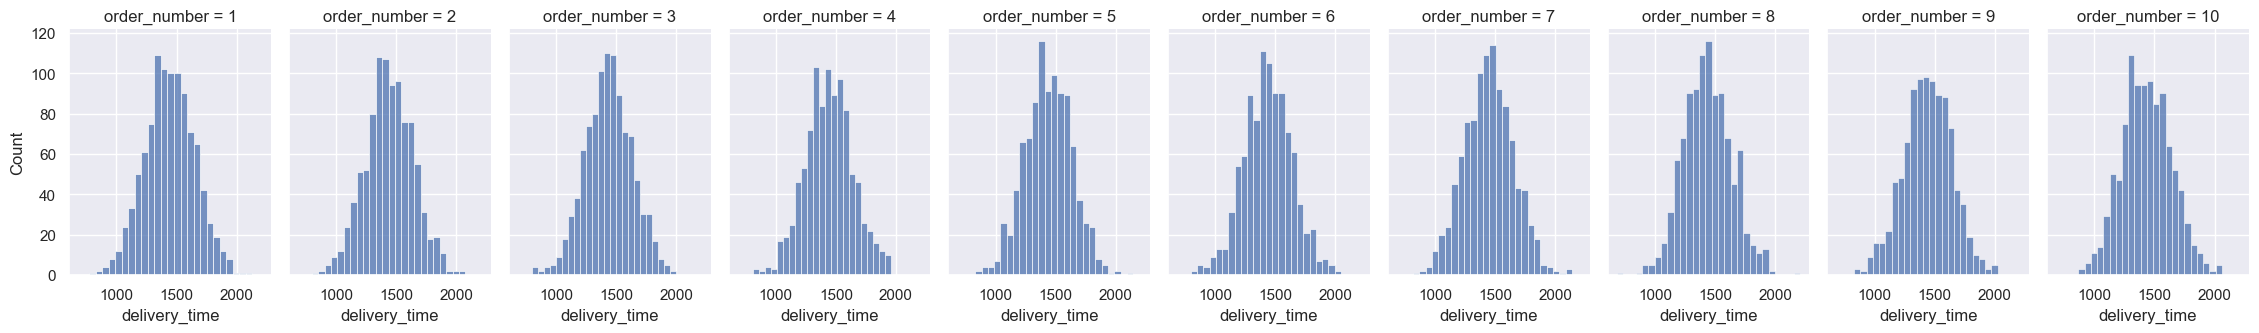

In [44]:
g = sns.FacetGrid(df, col="order_number", height=3.5, aspect=.65)
g.map(sns.histplot , 'delivery_time' )


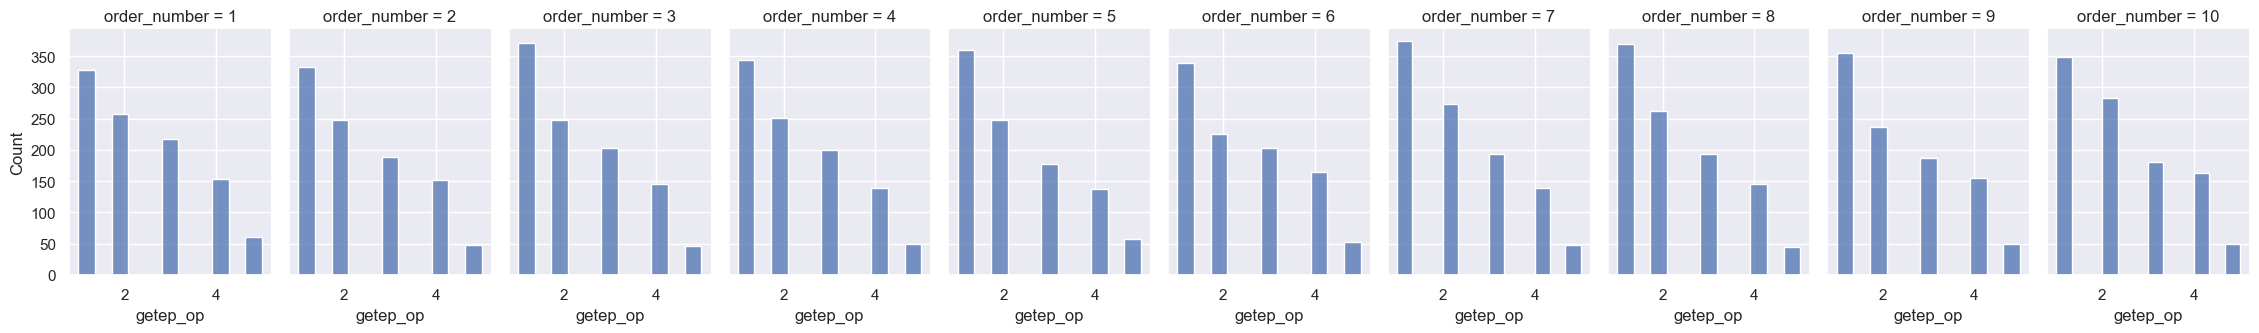

In [45]:
g = sns.FacetGrid(df, col="order_number", height=3.5, aspect=.65)
g.map(sns.histplot , 'getep_op' )

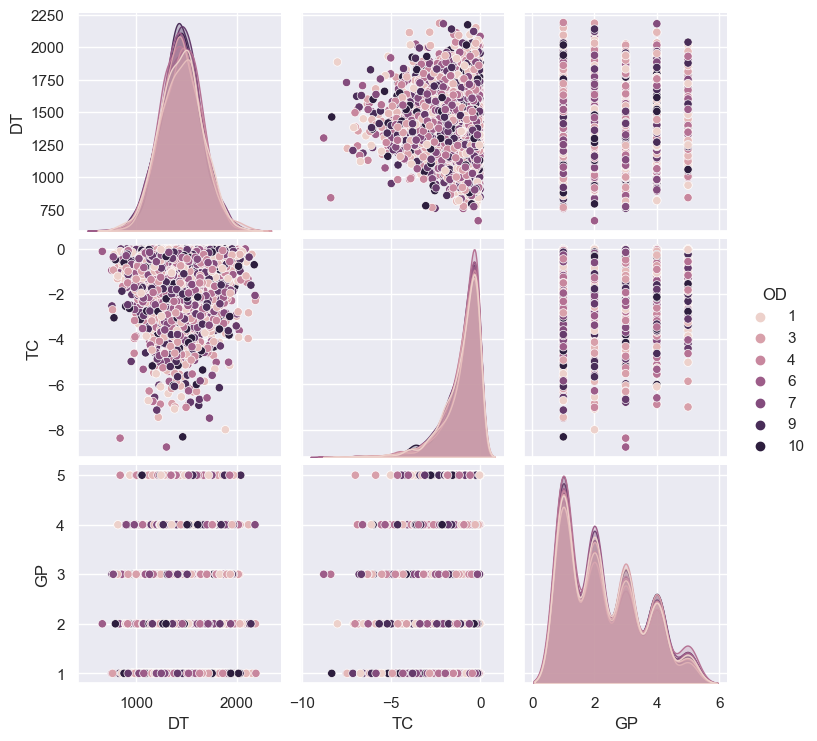

In [17]:
df_short = df.rename(columns = {'order_number': 'OD', 'delivery_time': 'DT',
                                'total_cost': 'TC', 'getep_op': 'GP'}, inplace = False)

sns.pairplot(df_short, hue = 'OD')

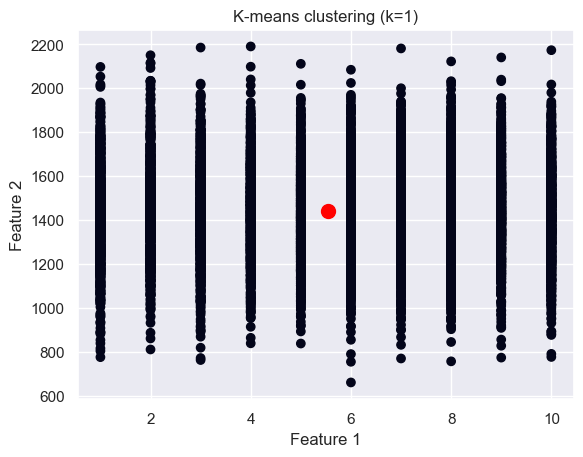

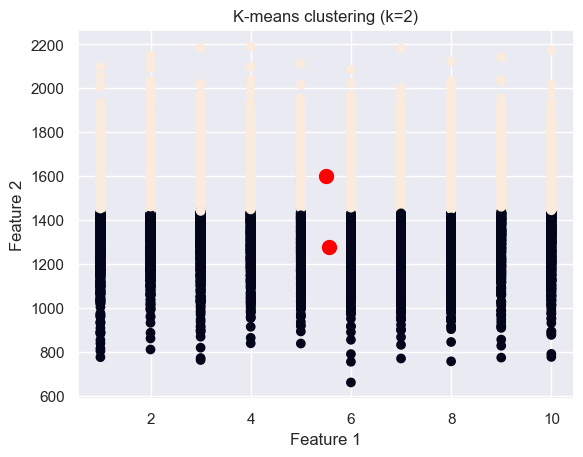

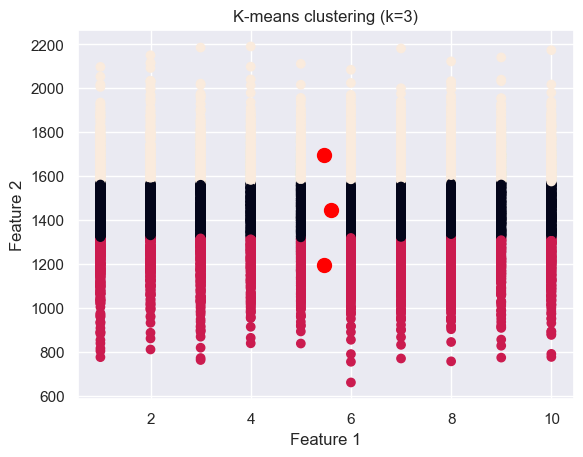

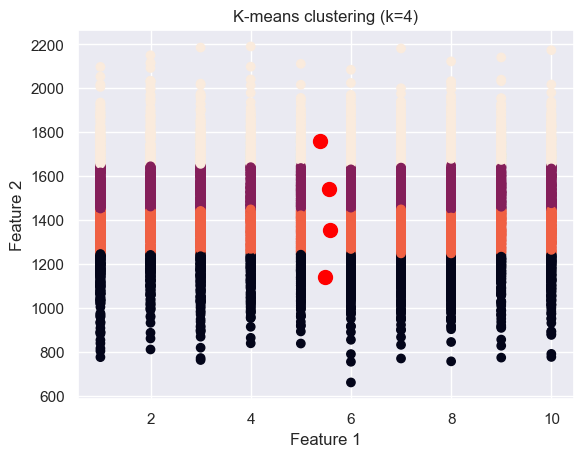

In [18]:

features = ['OD','DT','TC','GP']
X = df_short[features].values

k_range = range(1, 5)

inertia_values = []
 

for k in k_range:
    kmeans = KMeans(n_clusters=k, \
                    init='k-means++', random_state=42, n_init=10)
    y_kmeans = kmeans.fit_predict(X)
    inertia_values.append(kmeans.inertia_)
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)
    plt.scatter(kmeans.cluster_centers_[:, 0],\
                kmeans.cluster_centers_[:, 1], \
                s=100, c='red')
    plt.title('K-means clustering (k={})'.format(k))
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()